In [2]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [3]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [4]:

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4


,Title,Wins
0,Titanic,12
1,Ben-Hur,11
2,The Lord of the Rings: The Return of the King,11
3,West Side Story,10
4,The English Patient,9
...,...,...
1268,Broken Rainbow,1
1269,He Makes Me Feel Like Dancin',1
1270,The Harvey Girls,1
1271,Bullitt,1


In [5]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
# .rename(columns={"index":"Title", "film":"Nomination"})
#df2
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [7]:
df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Mutiny on the Bounty,15
3,Moulin Rouge,15
4,La La Land,14
...,...,...
4828,Sexy Beast,1
4829,Mysterious Castles of Clay,1
4830,The Hellstrom Chronicle,1
4831,The Flame of New Orleans,1


In [8]:
df3 = pd.merge(df2, df4, on="Title", how="left")
df3.fillna(0)

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Mutiny on the Bounty,15,1.0
3,Moulin Rouge,15,4.0
4,La La Land,14,6.0
...,...,...,...
4828,Sexy Beast,1,0.0
4829,Mysterious Castles of Clay,1,0.0
4830,The Hellstrom Chronicle,1,1.0
4831,The Flame of New Orleans,1,0.0


In [9]:
df2 = pd.DataFrame(df)

In [10]:
movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [11]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [12]:
# Merge on left dataframe to keep all streaming movies
#movies_clean_df2 = pd.merge(movies_clean_df, df2, on="Title", how="left")
combined_df = pd.merge(movies_clean_df, oscars_clean_df, on="Title", how="left")
combined_df.head()

,Title,Year_x,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Year_y,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,2010.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,NaN,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,NaN,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,NaN,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN


In [13]:
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               34
Year_x              34
Age                 33
IMDb                34
Rotten Tomatoes     32
Netflix             34
Hulu                34
Prime Video         34
Disney+             34
Type                34
Directors           33
Genres              34
Country             34
Language            34
Runtime             34
Year_y              34
Won Best Picture    34
dtype: int64

In [14]:
combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [15]:
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

In [16]:
# False = 0
# True = 1
# Wins
# Nominated

In [17]:
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(10)

,Title,Year_x,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Year_y,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,2010.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,2002.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,2012.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,1981.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,2009.0,1.0
10,Taxi Driver,1976,18+,8.3,95%,1,0,0,0,0,Martin Scorsese,"Crime,Drama",United States,"English,Spanish",114.0,1976.0,1.0
20,There Will Be Blood,2007,18+,8.2,91%,1,0,0,0,0,Paul Thomas Anderson,Drama,United States,"English,American Sign Language",158.0,2007.0,1.0
13,Room,2015,18+,8.1,93%,1,0,0,0,0,Lenny Abrahamson,"Drama,Thriller","Ireland,Canada,United Kingdom,United States",English,118.0,2015.0,1.0
30,Marriage Story,2019,18+,8.0,95%,1,0,0,0,0,Noah Baumbach,"Comedy,Drama,Romance","United Kingdom,United States","English,Spanish",137.0,2019.0,1.0
22,Dallas Buyers Club,2013,18+,8.0,93%,1,0,0,0,0,Jean-Marc Vallée,"Biography,Drama",United States,"English,Japanese",117.0,2013.0,1.0


In [18]:
combined_df['Country'].isnull().count()

16744

In [19]:
combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [20]:
combined_df.dtypes

Title                object
Year_x                int64
Age                  object
IMDb                float64
Rotten Tomatoes      object
Netflix               int64
Hulu                  int64
Prime Video           int64
Disney+               int64
Type                  int64
Directors            object
Genres               object
Country              object
Language             object
Runtime             float64
Year_y              float64
Won Best Picture    float64
dtype: object

In [21]:
combined_df['Country'].value_counts()

United States                                                                                                                                                                       8776
India                                                                                                                                                                               1064
United Kingdom                                                                                                                                                                       905
Canada                                                                                                                                                                               555
Australia                                                                                                                                                                            202
                                                                           

In [22]:
combined_df['Genres'].value_counts()

Drama                                             1341
Documentary                                       1229
Comedy                                            1040
Comedy,Drama                                       446
Horror                                             436
                                                  ... 
Documentary,Drama,History,Sci-Fi                     1
Comedy,Music,Romance,War                             1
Crime,Drama,Thriller,Action                          1
Action,Adventure,Comedy,Family,Musical,Romance       1
Animation,Action,Music,Western                       1
Name: Genres, Length: 1909, dtype: int64

In [23]:
genres_df = combined_df[['Genres', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Genres')
genres_df


,Netflix,Hulu,Prime Video,Disney+
Genres,,,,
"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
"Action,Sci-Fi",1,0,0,0
"Action,Adventure,Sci-Fi",1,0,0,0
"Adventure,Comedy,Sci-Fi",1,0,0,0
Western,1,0,1,0
...,...,...,...,...
"Comedy,Family,Fantasy,Horror",0,0,0,1
"Comedy,Family,Sci-Fi",0,0,0,1
Documentary,0,0,0,1


In [27]:

genres_df.reset_index()

,Genres,Netflix,Hulu,Prime Video,Disney+
0,"Action,Adventure,Sci-Fi,Thriller",1,0,0,0
1,"Action,Sci-Fi",1,0,0,0
2,"Action,Adventure,Sci-Fi",1,0,0,0
3,"Adventure,Comedy,Sci-Fi",1,0,0,0
4,Western,1,0,1,0
...,...,...,...,...,...
16739,"Comedy,Family,Fantasy,Horror",0,0,0,1
16740,"Comedy,Family,Sci-Fi",0,0,0,1
16741,Documentary,0,0,0,1
16742,Documentary,0,0,0,1


In [28]:
#combined_df['Country'].str.split(pat=",", n=-1, expand=True)

In [29]:
country_df = combined_df['Country'].value_counts()
country_df


United States                                                                                                                                                                       8776
India                                                                                                                                                                               1064
United Kingdom                                                                                                                                                                       905
Canada                                                                                                                                                                               555
Australia                                                                                                                                                                            202
                                                                           

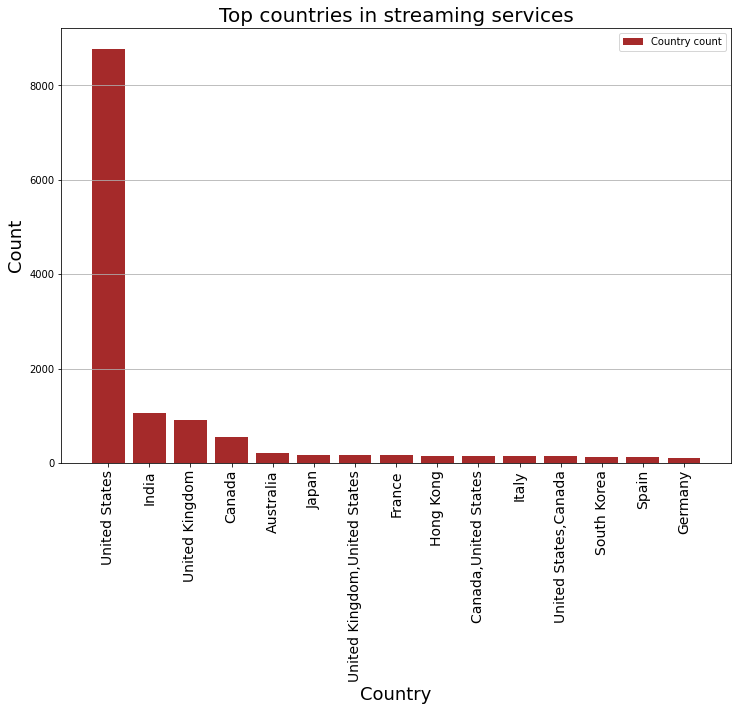

In [30]:
#Select the top 15 countries by value counts
country_top = country_df[0:15]
country_top_df=country_top.to_frame().reset_index().rename(columns={'index':'Country', 'Country':'Counts'})
#country_top_df=country_top_df.set_index('Country')
#country_top_df.dtypes
#country_top_df.isnull().count

#Specify x & y values
xvalues = country_top_df['Country'].values
yvalues= country_top_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(xvalues, yvalues, label='Country count', color='brown', alpha = 1, align="center")
plt.xticks(country_top_df['Country'].values, rotation=90, fontsize=14)

# Set a Title and labels
plt.title("Top countries in streaming services", fontsize=20)
plt.xlabel("Country", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/countries.png")
plt.show()



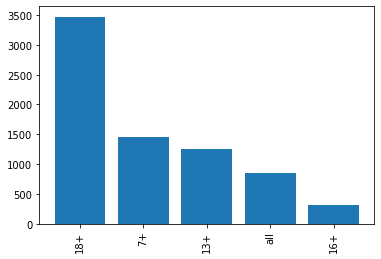

In [31]:
age = combined_df['Age'].value_counts()
#age
age_df=age.to_frame().reset_index().rename(columns={"index":"Age", "Age":"Counts"})
#age_df = age_df.set_index()
#age_df.set_index(Age)
#plt.pie =(age_df['Counts'].values, labels = index.values)
#plt.show()
#plt.pie(group_netflix.values,labels=group_netflix.index)
plt.bar(age.index, age.values)
plt.xticks(age.index, rotation=90)
plt.show()


In [32]:
#countries_stream_df = combined_df[['Country', 'Netflix', 'Hulu', 'Prime Video','Disney+']].set_index('Country')
#countries_stream_df.dropna(how='any')
#bool_series = pd.isnull(countries_stream_df['Hulu'])
#countries_stream_df[bool_series]
#countries_stream_df
stream_services_country = combined_df.groupby('Country')[['Netflix', 'Hulu', 'Prime Video','Disney+']].count()
#stream_services_country_df = stream_services_country.to_frame()
stream_services_country

,Netflix,Hulu,Prime Video,Disney+
Country,,,,
"Afghanistan,France",1,1,1,1
"Afghanistan,United States",1,1,1,1
"Albania,Austria,France",1,1,1,1
"Albania,Greece,France",1,1,1,1
"Albania,United States",1,1,1,1
...,...,...,...,...
"West Germany,Switzerland,United States",1,1,1,1
"West Germany,United States",4,4,4,4
Yugoslavia,1,1,1,1


In [33]:
seperated_country = combined_df['Country'].str.get_dummies(',')
seperated_country

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,...,United States,Uruguay,Vanuatu,Venezuela,Vietnam,West Germany,Yemen,Yugoslavia,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16740,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16741,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16742,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [34]:
country_top5 = country_df[0:6]
country_top5

United States     8776
India             1064
United Kingdom     905
Canada             555
Australia          202
Japan              175
Name: Country, dtype: int64

In [35]:
genre_count = {}
for x in combined_df["Genres"].values:
#     print(x)
    genres_list = x.split(",")
    for genre in genres_list:
        genre = genre.strip()
        if genre not in genre_count:
            genre_count[genre]=0
        genre_count[genre] +=1
genre_count

AttributeError: 'float' object has no attribute 'split'

In [ ]:
US_df = combined_df[combined_df["Country"]== 'United States']
US_df

In [71]:
#Create a dataframe for Netflix values =1
netflix_data = combined_df.copy()
netflix_data = netflix_data[combined_df['Netflix']==1]

#Create a dataframe for Prime Video values =1
prime_data = combined_df.copy()
prime_data = prime_data[combined_df['Prime Video']==1]

#Create a dataframe for Hulu values =1
hulu_data = combined_df.copy()
hulu_data = hulu_data[combined_df['Hulu']==1]

#Create a dataframe for Disney+ values =1
disney_data = combined_df.copy()
disney_data = disney_data[combined_df['Disney+']==1]


In [74]:
#Clean Rotten Tomatoes column to remove '%'sign
combined_df['New_Rotten_Tomatoes'] = combined_df['Rotten Tomatoes'].str.replace("%","")
rot_tom = combined_df['New_Rotten_Tomatoes'].value_counts().sort_values(ascending=False)
rotten_tomatoes_df = rot_tom.to_frame().reset_index().rename(columns={'index':'Ratings', 'New_Rotten_Tomatoes':'Counts'})
rotten_tomatoes_df
# combined_df['Rotten Tomatoes'].value_counts()


# for i in combined_df['New_Rotten_Tomatoes']:
#     if i is str:
#         i = i.astype(int)



,Ratings,Counts
0,100,407
1,80,162
2,50,136
3,83,131
4,67,126
...,...,...
94,7,10
95,5,10
96,4,9
97,2,4


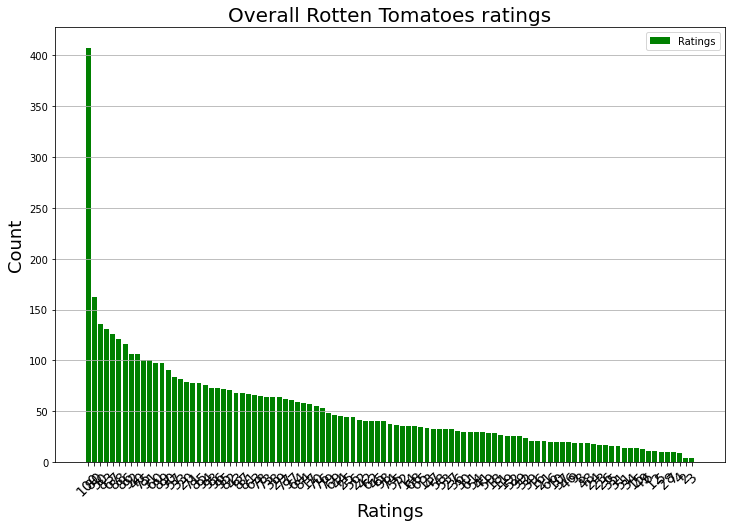

In [73]:
rot_x = rotten_tomatoes_df['Ratings'].values
rot_y= rotten_tomatoes_df["Counts"].values

#Plot the bar chart
plt.figure(figsize=(12,8))
plt.grid(axis='y')
plt.bar(rot_x, rot_y, label='Ratings', color='Green', alpha = 1, align="center")
plt.xticks(rot_x, rotation=45, fontsize=14)

# Set a Title and labels
plt.title("Overall Rotten Tomatoes ratings", fontsize=20)
plt.xlabel("Ratings", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.legend()

# Save the figure & show fig
plt.savefig("Images/rot_tom.png")
plt.show()


In [63]:
rot_tom_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [prime_data['Rotten Tomatoes'].value_counts()[0], 
                                                             hulu_data['Rotten Tomatoes'].value_counts()[0],
                                                             disney_data['Rotten Tomatoes'].value_counts()[0],
                                                             netflix_data['Rotten Tomatoes'].value_counts()[0]]})
rot_tom_scores

,Streaming Service,Rotten Tomato Score
0,Prime Video,257
1,Hulu,18
2,Disney+,19
3,NetFlix,130


<AxesSubplot:xlabel='Streaming Service'>

<Figure size 864x576 with 0 Axes>

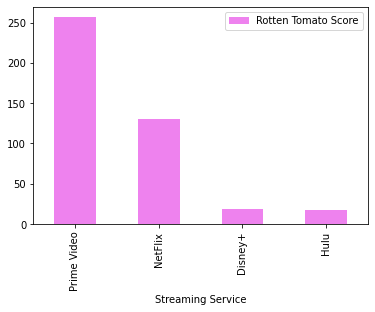

In [67]:
plt.figure(figsize=(12,8))
rot_tom_scores.sort_values(ascending=False, by="Rotten Tomato Score").plot.bar('Streaming Service', 'Rotten Tomato Score', 
                           color='Violet')
                                                                               
                                                                               

<AxesSubplot:>

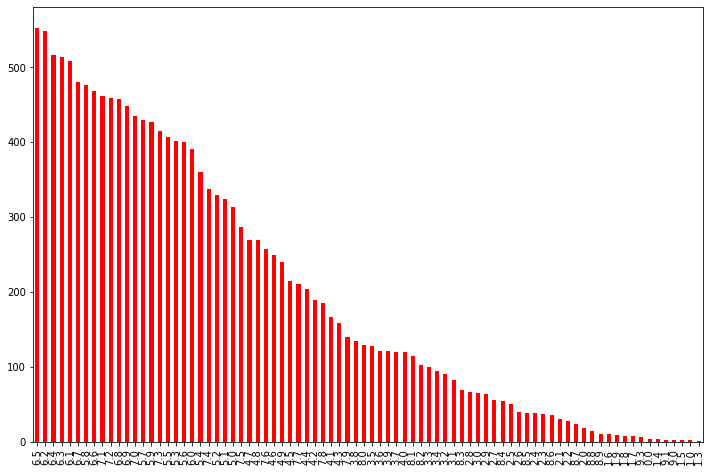

In [68]:
plt.figure(figsize=(12,8))
combined_df['IMDb'].value_counts().plot.bar('IMDb Ratings', "Count of Movies", color="Red")